In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble,metrics,cross_decomposition,linear_model,model_selection
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trainIdentity=pd.read_csv('train_identity.csv')
trainTranscation=pd.read_csv('train_transaction.csv')
trainIdentity.shape,trainTranscation.shape

((144233, 41), (590540, 394))

In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
trainIdentity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
combinedData=pd.merge(left=trainTranscation,right=trainIdentity,on='TransactionID',how='left')

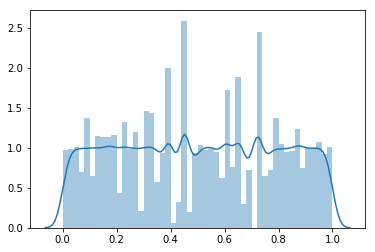

In [7]:
from sklearn import preprocessing
preQua=preprocessing.quantile_transform(combinedData[['TransactionAmt']])
sns.distplot(preQua)

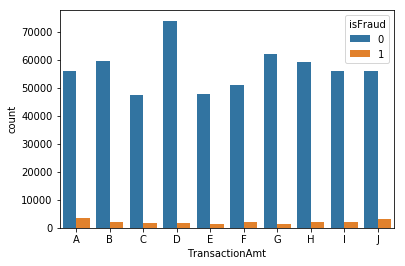

In [8]:
combinedData['TransactionAmt']=pd.cut(preQua.reshape(preQua.shape[0],),bins=[0, .1,.2,.3,.4,.5,.6,.7,.8,.9,1],
                     labels=['A','B','C','D','E','F','G','H','I','J'])

# sns.countplot(processedTrainTransaction['TransactionAmt'])
sns.countplot(combinedData['TransactionAmt'],hue=combinedData['isFraud'])

In [ ]:
# toleaveTrainCombined[['addr1','card1', 'card2', 'card3','card5', 'addr2']]

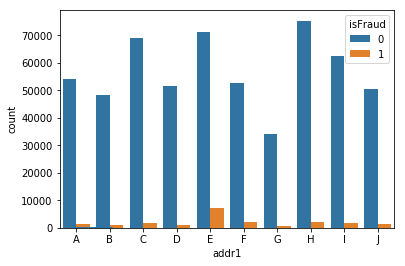

In [12]:
preQua1=preprocessing.quantile_transform(combinedData[['addr1']].fillna(combinedData[['addr1']].mean()))
sns.distplot(preQua1)

combinedData['addr1']=pd.cut(preQua1.reshape(preQua1.shape[0],),bins=[0, .1,.2,.3,.4,.5,.6,.7,.8,.9,1],
                     labels=['A','B','C','D','E','F','G','H','I','J'])

# sns.countplot(processedTrainTransaction['TransactionAmt'])
sns.countplot(combinedData['addr1'],hue=combinedData['isFraud'])

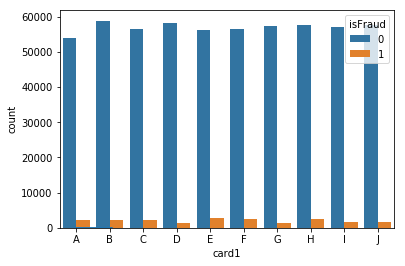

In [13]:
preQua2=preprocessing.quantile_transform(combinedData[['card1']].fillna(combinedData[['card1']].mean()))
sns.distplot(preQua2)

combinedData['card1']=pd.cut(preQua2.reshape(preQua2.shape[0],),bins=[0, .1,.2,.3,.4,.5,.6,.7,.8,.9,1],
                     labels=['A','B','C','D','E','F','G','H','I','J'])

# sns.countplot(processedTrainTransaction['TransactionAmt'])
sns.countplot(combinedData['card1'],hue=combinedData['isFraud'])

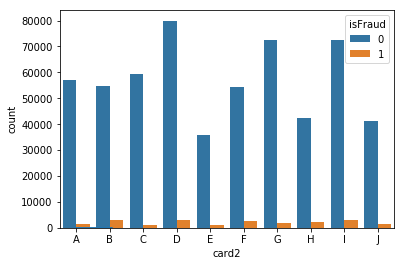

In [14]:
preQua3=preprocessing.quantile_transform(combinedData[['card2']].fillna(combinedData[['card2']].mean()))
sns.distplot(preQua)

combinedData['card2']=pd.cut(preQua3.reshape(preQua3.shape[0],),bins=[0, .1,.2,.3,.4,.5,.6,.7,.8,.9,1],
                     labels=['A','B','C','D','E','F','G','H','I','J'])

# sns.countplot(processedTrainTransaction['TransactionAmt'])
sns.countplot(combinedData['card2'],hue=combinedData['isFraud'])

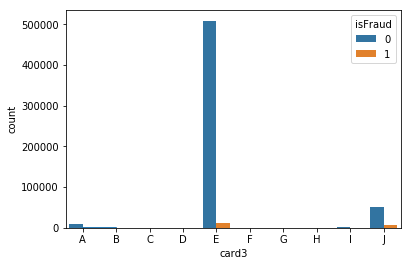

In [15]:
preQua4=preprocessing.quantile_transform(combinedData[['card3']].fillna(combinedData[['card3']].mean()))
sns.distplot(preQua4)

combinedData['card3']=pd.cut(preQua4.reshape(preQua4.shape[0],),bins=[0, .1,.2,.3,.4,.5,.6,.7,.8,.9,1],
                     labels=['A','B','C','D','E','F','G','H','I','J'])

# sns.countplot(processedTrainTransaction['TransactionAmt'])
sns.countplot(combinedData['card3'],hue=combinedData['isFraud'])

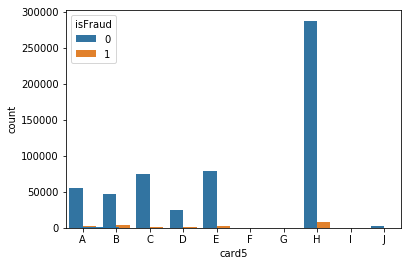

In [16]:
preQua5=preprocessing.quantile_transform(combinedData[['card5']].fillna(combinedData[['card5']].mean()))
sns.distplot(preQua5)

combinedData['card5']=pd.cut(preQua5.reshape(preQua5.shape[0],),bins=[0, .1,.2,.3,.4,.5,.6,.7,.8,.9,1],
                     labels=['A','B','C','D','E','F','G','H','I','J'])

# sns.countplot(processedTrainTransaction['TransactionAmt'])
sns.countplot(combinedData['card5'],hue=combinedData['isFraud'])

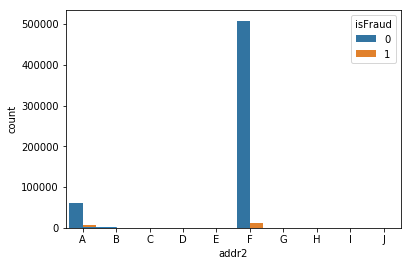

In [17]:
preQua6=preprocessing.quantile_transform(combinedData[['addr2']].fillna(combinedData[['addr2']].mean()))
sns.distplot(preQua6)

combinedData['addr2']=pd.cut(preQua6.reshape(preQua6.shape[0],),bins=[0, .1,.2,.3,.4,.5,.6,.7,.8,.9,1],
                     labels=['A','B','C','D','E','F','G','H','I','J'])

# sns.countplot(processedTrainTransaction['TransactionAmt'])
sns.countplot(combinedData['addr2'],hue=combinedData['isFraud'])

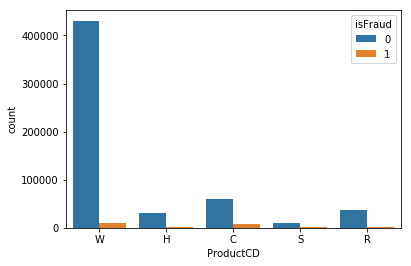

In [9]:
sns.countplot(combinedData['ProductCD'],hue=combinedData['isFraud'])

In [18]:
categoricalCombinedData=['DeviceType','DeviceInfo']+['id_'+str(i) for i in range(12,39)]+\
                        ['M'+str(i) for i in range(1,10)]+\
                        ['ProductCD','P_emaildomain', 'R_emaildomain','CountryDomain','card4', 'card6',]+\
                        ['CountryDomain', 'TransactionAmt',]+['addr1','card1', 'card2', 'card3','card5', 'addr2']

In [21]:
leaveCols=['TransactionID', 'isFraud', 'TransactionDT']+\
            ['C'+str(i) for i in range(1,15)]+\
            ['D'+str(i) for i in range(1,16)]+\
            ['V'+str(i) for i in range(1,340)]
#             ['addr1','card1', 'card2', 'card3','card5', 'addr2']+\
            
# tonormalize=['addr1','card1', 'card2', 'card3','card5', 'addr2']

In [22]:
def screenReso(xRes):
    if str(xRes) == 'nan':
        return ('No info')
    else:
        widVal=int(xRes.split('x')[0])
        if widVal <=850:
            return ('Small Screen')
        elif widVal <=2050:
            return ('Med Screen')
        elif widVal <=2250:
            return ('2K Screen')
        elif widVal > 2250:
            return ('4K Screen')

In [23]:
def browserDef(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        if 'samsung' in brRec:
            return 'Samsung Browser'
        elif 'mobile safari' in brRec:
            return 'Mobile Safari'
        elif 'chrome' in brRec:
            return 'Chrome Browser'
        elif 'edge' in brRec:
            return 'Edge Browser'
        elif 'ie' in brRec:
            return 'IE Browser'
        elif 'firefox' in brRec:
            return 'Firefox Browser'
        elif 'opera' in brRec:
            return 'Opera Browser'
        elif ('Android' in brRec) or ('android' in brRec):
            return 'Android Browser'
        elif 'Mozilla' in brRec:
            return 'Mozilla Browser'
        elif 'safari' in brRec:
            return 'Safari  Browser'
        elif 'google' in brRec:
            return 'Google Browser'
        else:
            return brRec

In [24]:
def deviceDef(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        if 'Android' in brRec:
            return 'Android Device'
        elif 'iOS' in brRec:
            return 'iOS Device'
        elif 'Windows' in brRec:
            return 'Windows Device'
        elif 'Mac' in brRec:
            return 'Mac OS Device'
        else:
            return brRec

In [25]:
def numDef(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        if brRec < 120:
            return (' Less than 120')
        elif brRec < 140:
            return (' Less than 140')
        elif brRec < 160:
            return (' Less than 160')
        elif brRec < 180:
            return (' Less than 180')
        elif brRec < 200:
            return (' Less than 200')
        elif brRec > 200:
            return (' Greater than 140')
        else:
            return 'other'

In [26]:
def numDef25(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        if brRec < 150:
            return (' Less than 150')
        elif brRec < 200:
            return (' Less than 200')
        elif brRec < 250:
            return (' Less than 250')
        elif brRec < 300:
            return (' Less than 300')
        elif brRec < 400:
            return (' Less than 400')
        elif brRec > 400:
            return (' Greater than 400')
        else:
            return 'other'

In [27]:
def numDef21(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        if brRec < 150:
            return (' Less than 150')
        elif brRec < 200:
            return (' Less than 200')
        elif brRec < 300:
            return (' Less than 300')
        elif brRec < 400:
            return (' Less than 400')
        elif brRec < 600:
            return (' Less than 600')
        elif brRec > 600:
            return (' Greater than 600')
        else:
            return 'other'

In [28]:
def numDef13(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        if brRec < 20:
            return (' Less than 20')
        elif brRec < 40:
            return (' Less than 40')
        elif brRec < 60:
            return (' Less than 60')
        elif brRec < 80:
            return (' Less than 80')
        elif brRec > 80:
            return (' Greater than 80')
        else:
            return 'other'

In [29]:
def deviceInfoDef(brRec):
    if str(brRec)=='nan':
        return 'Other'
    else:
        if ('SAMSUNG' in brRec) or ('SM' in brRec) or ('GT' in brRec):
            return 'SAMSUNG Device'
        elif 'iOS' in brRec:
            return 'iOS Device'
        elif 'Windows' in brRec:
            return 'Windows Device'
        elif 'LG' in brRec:
            return 'LG Device'
        elif 'HUAWEI' in brRec:
            return 'HUAWEI Device'
        elif 'MacOS' in brRec:
            return 'MacOS Device'
#         elif 'Lenovo' in brRec:
#             return 'Lenovo Device'
#         elif 'Redmi' in brRec:
#             return 'Redmi Device'
        elif ('Moto' in brRec) or ('moto' in brRec):
            return 'Moto Device'
        elif ('Nexus' in brRec) or ('Pixel' in brRec):
            return 'MacOS Device'
#         elif 'HTC' in brRec:
#             return 'HTC Device'
#         elif 'Android' in brRec:
#             return 'Android Device'
#         elif 'Blade' in brRec:
#             return 'Blade Device'
#         elif ('Nokia' in brRec) or ('NOKIA' in brRec):
#             return 'Nokia Device'
#         elif ('ASUS' in brRec) or ('Asus' in brRec):
#             return 'ASUS Device'
        else:
            return 'Other'

In [30]:
def numDef14(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        if brRec < -470:
            return (' Less than -470')
        elif brRec < -290:
            return (' Less than -290')
        elif brRec < 1:
            return (' Less than 1')
        elif brRec < 60:
            return (' Less than 60')
        elif brRec > 60:
            return (' Greater than 60')
        else:
            return 'other'

In [31]:
def numDef22(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        if brRec < 10:
            return ('Less than 10')
        else:
            return ('Greater than 10')

In [32]:
def numDef24(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        if brRec < 12:
            return ('Less than 12')
        else:
            return ('Greater than 12')

In [33]:
def numDef18(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        if brRec < 14:
            return ('Less than 14')
        else:
            return ('Greater than 14')

In [34]:
def numDef32(brRec):
    if str(brRec)=='nan':
        return 'other'
    else:
        return (int(brRec))

In [35]:
def defGetCountryFromDomain(brRec):
    if str(brRec)=='nan':
        return 'Other'
    else:
        if ('.mx' in brRec):
            return 'Mexico email'
        elif '.jp' in brRec:
            return 'Japan email'
        elif '.uk' in brRec:
            return 'UK email'
        elif '.de' in brRec:
            return 'Germany email'
        elif '.es' in brRec:
            return 'Spain email'
        elif '.fr' in brRec:
            return 'France email'
        elif '.com' in brRec:
            return 'Global email'
        elif '.net' in brRec:
            return 'Net email'
        else:
            return 'Other'

In [36]:
def defCard6(brRec):
    if str(brRec)=='nan':
        return 'Other'
    else:
        if ('debit or credit' in brRec):
            return 'debit'
        else:
            return (brRec)

In [37]:
combinedData['id_33']=combinedData['id_33'].apply(lambda x: screenReso(x))
combinedData['id_31']=combinedData['id_31'].apply(lambda x: browserDef(x))
combinedData['id_30']=combinedData['id_30'].apply(lambda x: deviceDef(x))
combinedData['id_26']=combinedData['id_26'].apply(lambda x: numDef(x))
combinedData['id_25']=combinedData['id_25'].apply(lambda x: numDef25(x))
combinedData['id_21']=combinedData['id_21'].apply(lambda x: numDef21(x))
combinedData['id_20']=combinedData['id_20'].apply(lambda x: numDef21(x))
combinedData['id_19']=combinedData['id_19'].apply(lambda x: numDef21(x))
combinedData['id_17']=combinedData['id_17'].apply(lambda x: numDef(x))
combinedData['id_13']=combinedData['id_13'].apply(lambda x: numDef13(x))
combinedData['DeviceInfo']=combinedData['DeviceInfo'].apply(lambda x: deviceInfoDef(x))
combinedData['id_14']=combinedData['id_14'].apply(lambda x: numDef14(x))
combinedData['id_22']=combinedData['id_22'].apply(lambda x: numDef22(x))
combinedData['id_24']=combinedData['id_24'].apply(lambda x: numDef24(x))
combinedData['id_18']=combinedData['id_18'].apply(lambda x: numDef18(x))
combinedData['id_32']=combinedData['id_32'].apply(lambda x: numDef32(x))

combinedData['CountryDomain']=combinedData['P_emaildomain'].apply(lambda x: defGetCountryFromDomain(x))
combinedData['R_emaildomain']=combinedData['R_emaildomain'].fillna('Other')
combinedData['P_emaildomain']=combinedData['P_emaildomain'].fillna('Other')
combinedData['card4']=combinedData['card4'].fillna('Other')
combinedData['card6']=combinedData['card6'].apply(lambda x: defCard6(x))

In [38]:
for j in categoricalCombinedData:
    print ('>>>>>>>>>>>',j.zfill(12),'>>>>',len(pd.unique(combinedData[j])))

>>>>>>>>>>> 00DeviceType >>>> 3
>>>>>>>>>>> 00DeviceInfo >>>> 8
>>>>>>>>>>> 0000000id_12 >>>> 3
>>>>>>>>>>> 0000000id_13 >>>> 5
>>>>>>>>>>> 0000000id_14 >>>> 5
>>>>>>>>>>> 0000000id_15 >>>> 4
>>>>>>>>>>> 0000000id_16 >>>> 3
>>>>>>>>>>> 0000000id_17 >>>> 7
>>>>>>>>>>> 0000000id_18 >>>> 3
>>>>>>>>>>> 0000000id_19 >>>> 7
>>>>>>>>>>> 0000000id_20 >>>> 7
>>>>>>>>>>> 0000000id_21 >>>> 7
>>>>>>>>>>> 0000000id_22 >>>> 2
>>>>>>>>>>> 0000000id_23 >>>> 4
>>>>>>>>>>> 0000000id_24 >>>> 3
>>>>>>>>>>> 0000000id_25 >>>> 7
>>>>>>>>>>> 0000000id_26 >>>> 7
>>>>>>>>>>> 0000000id_27 >>>> 3
>>>>>>>>>>> 0000000id_28 >>>> 3
>>>>>>>>>>> 0000000id_29 >>>> 3
>>>>>>>>>>> 0000000id_30 >>>> 7
>>>>>>>>>>> 0000000id_31 >>>> 39
>>>>>>>>>>> 0000000id_32 >>>> 5
>>>>>>>>>>> 0000000id_33 >>>> 5
>>>>>>>>>>> 0000000id_34 >>>> 5
>>>>>>>>>>> 0000000id_35 >>>> 3
>>>>>>>>>>> 0000000id_36 >>>> 3
>>>>>>>>>>> 0000000id_37 >>>> 3
>>>>>>>>>>> 0000000id_38 >>>> 3
>>>>>>>>>>> 0000000000M1 >>>> 3
>>>>>>>>>>> 0000000000M2 >>>> 3
>>>>>>>

In [29]:
# towork='id_18'
# fig, ax = plt.subplots(figsize=(15,5))
# sns.countplot(trainIdentity[towork].fillna(0))
# # sns.countplot(trainIdentity['id_34'].fillna(0),ax=ax)

# trainIdentity['id_18']=trainIdentity['id_18'].apply(lambda x: numDef18(x))
# len(pd.unique(trainIdentity[towork]))
# list(pd.unique(trainIdentity[towork]))

In [39]:
cateDataTrainCombined=pd.get_dummies(combinedData[categoricalCombinedData],prefix_sep='_',drop_first='True')

In [40]:
toleaveTrainCombined=combinedData[leaveCols].fillna(-9999)
cateDataTrainCombined=cateDataTrainCombined.fillna('Other')

In [42]:
# proProcess1=preprocessing.MinMaxScaler()
# toleaveTrainCombined['addr1']=proProcess1.fit_transform(toleaveTrainCombined[['addr1']])

In [ ]:
# proProcess2=preprocessing.MinMaxScaler()
# toleaveTrainCombined['card1']=proProcess2.fit_transform(toleaveTrainCombined[['card1']])

In [36]:
# proProcess3=preprocessing.MinMaxScaler()
# toleaveTrainCombined['card2']=proProcess3.fit_transform(toleaveTrainCombined[['card2']])

In [37]:
# proProcess4=preprocessing.MinMaxScaler()
# toleaveTrainCombined['card3']=proProcess4.fit_transform(toleaveTrainCombined[['card3']])

In [38]:
# proProcess5=preprocessing.MinMaxScaler()
# toleaveTrainCombined['card5']=proProcess5.fit_transform(toleaveTrainCombined[['card5']])

In [39]:
# proProcess6=preprocessing.MinMaxScaler()
# toleaveTrainCombined['addr2']=proProcess6.fit_transform(toleaveTrainCombined[['addr2']])

In [41]:
# toleaveTrainCombined[['addr1','card1', 'card2', 'card3','card5', 'addr2']]

In [ ]:
# towork='addr2'
# # fig, ax = plt.subplots(figsize=(15,5))
# # sns.countplot(trainTranscation[towork].fillna(0))
# # sns.countplot(trainIdentity['id_34'].fillna(0),ax=ax)

# trainTranscation['card6']=trainTranscation['card6'].apply(lambda x: defCard6(x))
# len(pd.unique(trainTranscation[towork]))
# list(pd.unique(trainTranscation[towork]))

In [43]:
processedTrainTransaction=pd.concat([toleaveTrainCombined,cateDataTrainCombined],axis=1)
processedTrainTransaction.shape

(590540, 715)

In [44]:
tempTimeSer=((processedTrainTransaction['TransactionDT']-86400)).map(int)
processedTrainTransaction['transSec']=tempTimeSer%60
processedTrainTransaction['transMin']=(tempTimeSer/60).map(int)%60
processedTrainTransaction['transHour']=(tempTimeSer/3600).map(int)%24
processedTrainTransaction['transMonth']=((tempTimeSer/86400)//30)+1
processedTrainTransaction['transDay']=((tempTimeSer/86400)%30).map(int)+1

In [45]:
del processedTrainTransaction['TransactionDT']
del processedTrainTransaction['TransactionID']

In [46]:
processedTrainTransaction.tail()

,isFraud,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,addr2_F,addr2_G,addr2_H,addr2_I,addr2_J,transSec,transMin,transHour,transMonth,transDay
590535,0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,1,0,0,0,0,27,57,23,7.0,2
590536,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,0,0,29,57,23,7.0,2
590537,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1,0,0,0,0,59,57,23,7.0,2
590538,0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,...,1,0,0,0,0,8,58,23,7.0,2
590539,0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,...,1,0,0,0,0,51,58,23,7.0,2


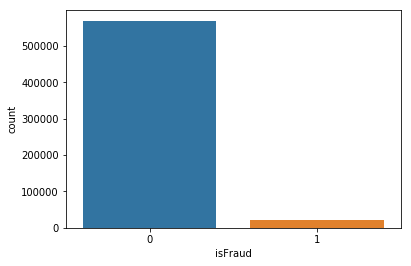

In [47]:
sns.countplot(processedTrainTransaction['isFraud'])
# sns.countplot(processedTrainTransaction['transMonth'],hue=processedTrainTransaction['isFraud'])

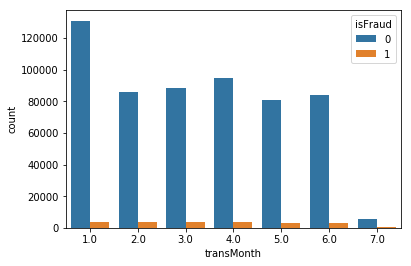

In [48]:
# sns.countplot(processedTrainTransaction['transMonth'])
sns.countplot(processedTrainTransaction['transMonth'],hue=processedTrainTransaction['isFraud'])

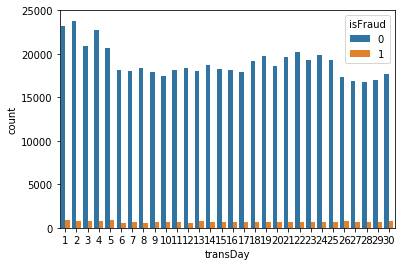

In [49]:
# sns.countplot(processedTrainTransaction['transDay'])
sns.countplot(processedTrainTransaction['transDay'],hue=processedTrainTransaction['isFraud'])

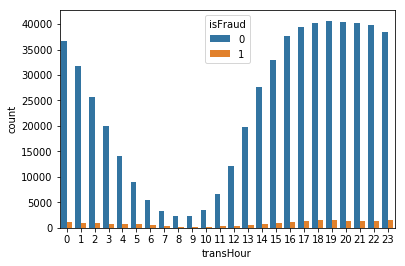

In [50]:
# sns.countplot(processedTrainTransaction['transHour'])
sns.countplot(processedTrainTransaction['transHour'],hue=processedTrainTransaction['isFraud'])

In [51]:
# sns.countplot(processedTrainTransaction['transMin'])

In [52]:
# sns.countplot(processedTrainTransaction['transSec'])

In [53]:
target='isFraud'
toUseCol=list(processedTrainTransaction.columns)
toUseCol.remove(target)

In [54]:
trainPart=processedTrainTransaction[processedTrainTransaction['transMonth']<=4]
valPart=processedTrainTransaction[processedTrainTransaction['transMonth']==5]
testPart=processedTrainTransaction[processedTrainTransaction['transMonth']>5]
trainPart.shape,valPart.shape,testPart.shape

((414542, 718), (83571, 718), (92427, 718))

In [55]:
from sklearn import ensemble,metrics

In [56]:
# model1=ensemble.RandomForestClassifier().fit(trainPart[toUseCol],trainPart[target])
# predTrain=model1.predict_proba(trainPart[toUseCol])
# scoreOftrain=metrics.roc_auc_score(trainPart[target],predTrain[:,1])
# valPred=model1.predict_proba(valPart[toUseCol])
# scoreOfVal=metrics.roc_auc_score(valPart[target],valPred[:,1])
# print('ROC AUC for train {} and for validation {}'.format(scoreOftrain,scoreOfVal))

In [57]:
# model2=ensemble.GradientBoostingClassifier().fit(trainPart[toUseCol],trainPart[target])
# predTrain2=model2.predict_proba(trainPart[toUseCol])
# scoreOftrain2=metrics.roc_auc_score(trainPart[target],predTrain2[:,1])
# valPred2=model2.predict_proba(valPart[toUseCol])
# scoreOfVal2=metrics.roc_auc_score(valPart[target],valPred2[:,1])
# print('ROC AUC for train {} and for validation {}'.format(scoreOftrain2,scoreOfVal2))

In [58]:
import lightgbm as lgb

In [59]:
trainData=lgb.Dataset(trainPart[toUseCol],trainPart[target])
valData=lgb.Dataset(valPart[toUseCol],valPart[target])

In [60]:
lgb_params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
#         'metric':metrics,
        'learning_rate': 0.01,
        #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 4,
        'verbose': 0,
        'metric':'auc'
    }

num_boost_round=3000
early_stopping_rounds=10

model3 = lgb.train(lgb_params, 
                     trainData, 
                     valid_sets=[trainData, valData], 
                   valid_names=['train','valid'],
#                      evals_result=evals_results, 
                     num_boost_round=num_boost_round,
                     early_stopping_rounds=early_stopping_rounds,
                     verbose_eval=10)

Training until validation scores don't improve for 10 rounds.
[10]	train's auc: 0.856714	valid's auc: 0.843786
[20]	train's auc: 0.86482	valid's auc: 0.84716
[30]	train's auc: 0.868804	valid's auc: 0.849681
[40]	train's auc: 0.871413	valid's auc: 0.85245
[50]	train's auc: 0.874067	valid's auc: 0.854287
[60]	train's auc: 0.87558	valid's auc: 0.856028
[70]	train's auc: 0.877094	valid's auc: 0.85724
[80]	train's auc: 0.878796	valid's auc: 0.858966
[90]	train's auc: 0.880351	valid's auc: 0.859858
[100]	train's auc: 0.881505	valid's auc: 0.860974
[110]	train's auc: 0.882689	valid's auc: 0.861999
[120]	train's auc: 0.884016	valid's auc: 0.863208
[130]	train's auc: 0.885284	valid's auc: 0.863407
[140]	train's auc: 0.886685	valid's auc: 0.864364
[150]	train's auc: 0.887922	valid's auc: 0.865315
[160]	train's auc: 0.888919	valid's auc: 0.865879
[170]	train's auc: 0.889761	valid's auc: 0.866269
[180]	train's auc: 0.890604	valid's auc: 0.867091
[190]	train's auc: 0.891596	valid's auc: 0.867342
[2

In [61]:
predTrain3=model3.predict(trainPart[toUseCol])
scoreOftrain3=metrics.roc_auc_score(trainPart[target],predTrain3)
valPred3=model3.predict(valPart[toUseCol])
scoreOfVal3=metrics.roc_auc_score(valPart[target],valPred3)
testPred3=model3.predict(testPart[toUseCol])
scoreOfTest3=metrics.roc_auc_score(testPart[target],testPred3)
print('ROC AUC for train {} and for validation {} for test {}'.format(scoreOftrain3,scoreOfVal3,scoreOfTest3))

ROC AUC for train 0.9426522660854317 and for validation 0.9028017448882298 for test 0.899984990820444


In [ ]:
# ROC AUC for train 0.9543954336563735 and for validation 0.9114576197806739 for test 0.9040375652381945